# Day1 - Part D Visualising data

In this notebook, we briefly show a few options for you to visualise data:
1. **Matplotlib** (the standard plotting library)
1. **Seaborn** (to beautify standard plots)
1. **Bokeh** (to create rich, interactive plots)
1. **Plotly** (similar to Bokeh, might require that you register with plot.ly to obtain an API key; Plotly Offline does not require account)

We provide pointers to documentations etc. so that you can look up further diagram types and beautification options yourself.

## 0.0 Importing the data again (as we did before)

In [17]:
# Pandas is a library that provides functionality similar to R - with dataframes that can contain different data types
# Documentation: http://pandas.pydata.org/pandas-docs/stable/
import pandas as pd

# Import the data into a Pandas DataFrame
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

# Display the first 10 rows (= row 0 to 9)
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## 1.0 Visualising data using Pandas and Matplotlib

Documentations if you want to read more about available options:
* [Pandas Visualisation documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Matplotlib User's Guide](https://matplotlib.org/users/index.html)
* [Matplotlib Gallery for your inspiration](https://matplotlib.org/2.1.0/gallery/index.html)
* [Tutorial for Matplotlib Pyplot](https://matplotlib.org/2.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

In [18]:
# Here, we import matplotlib (a comprehensive plotting library)
# We give it a shorter name ('plt') that we can refer to in the code
import matplotlib.pyplot as plt

# We need to add the following line to tell matplotlib to just plot the figure right into the notebook
%matplotlib inline

# We add a style to our plots so they look nicer
plt.style.use('ggplot')

We can now use the matplotlib library to visualise our data in various ways.

#### Boxplots

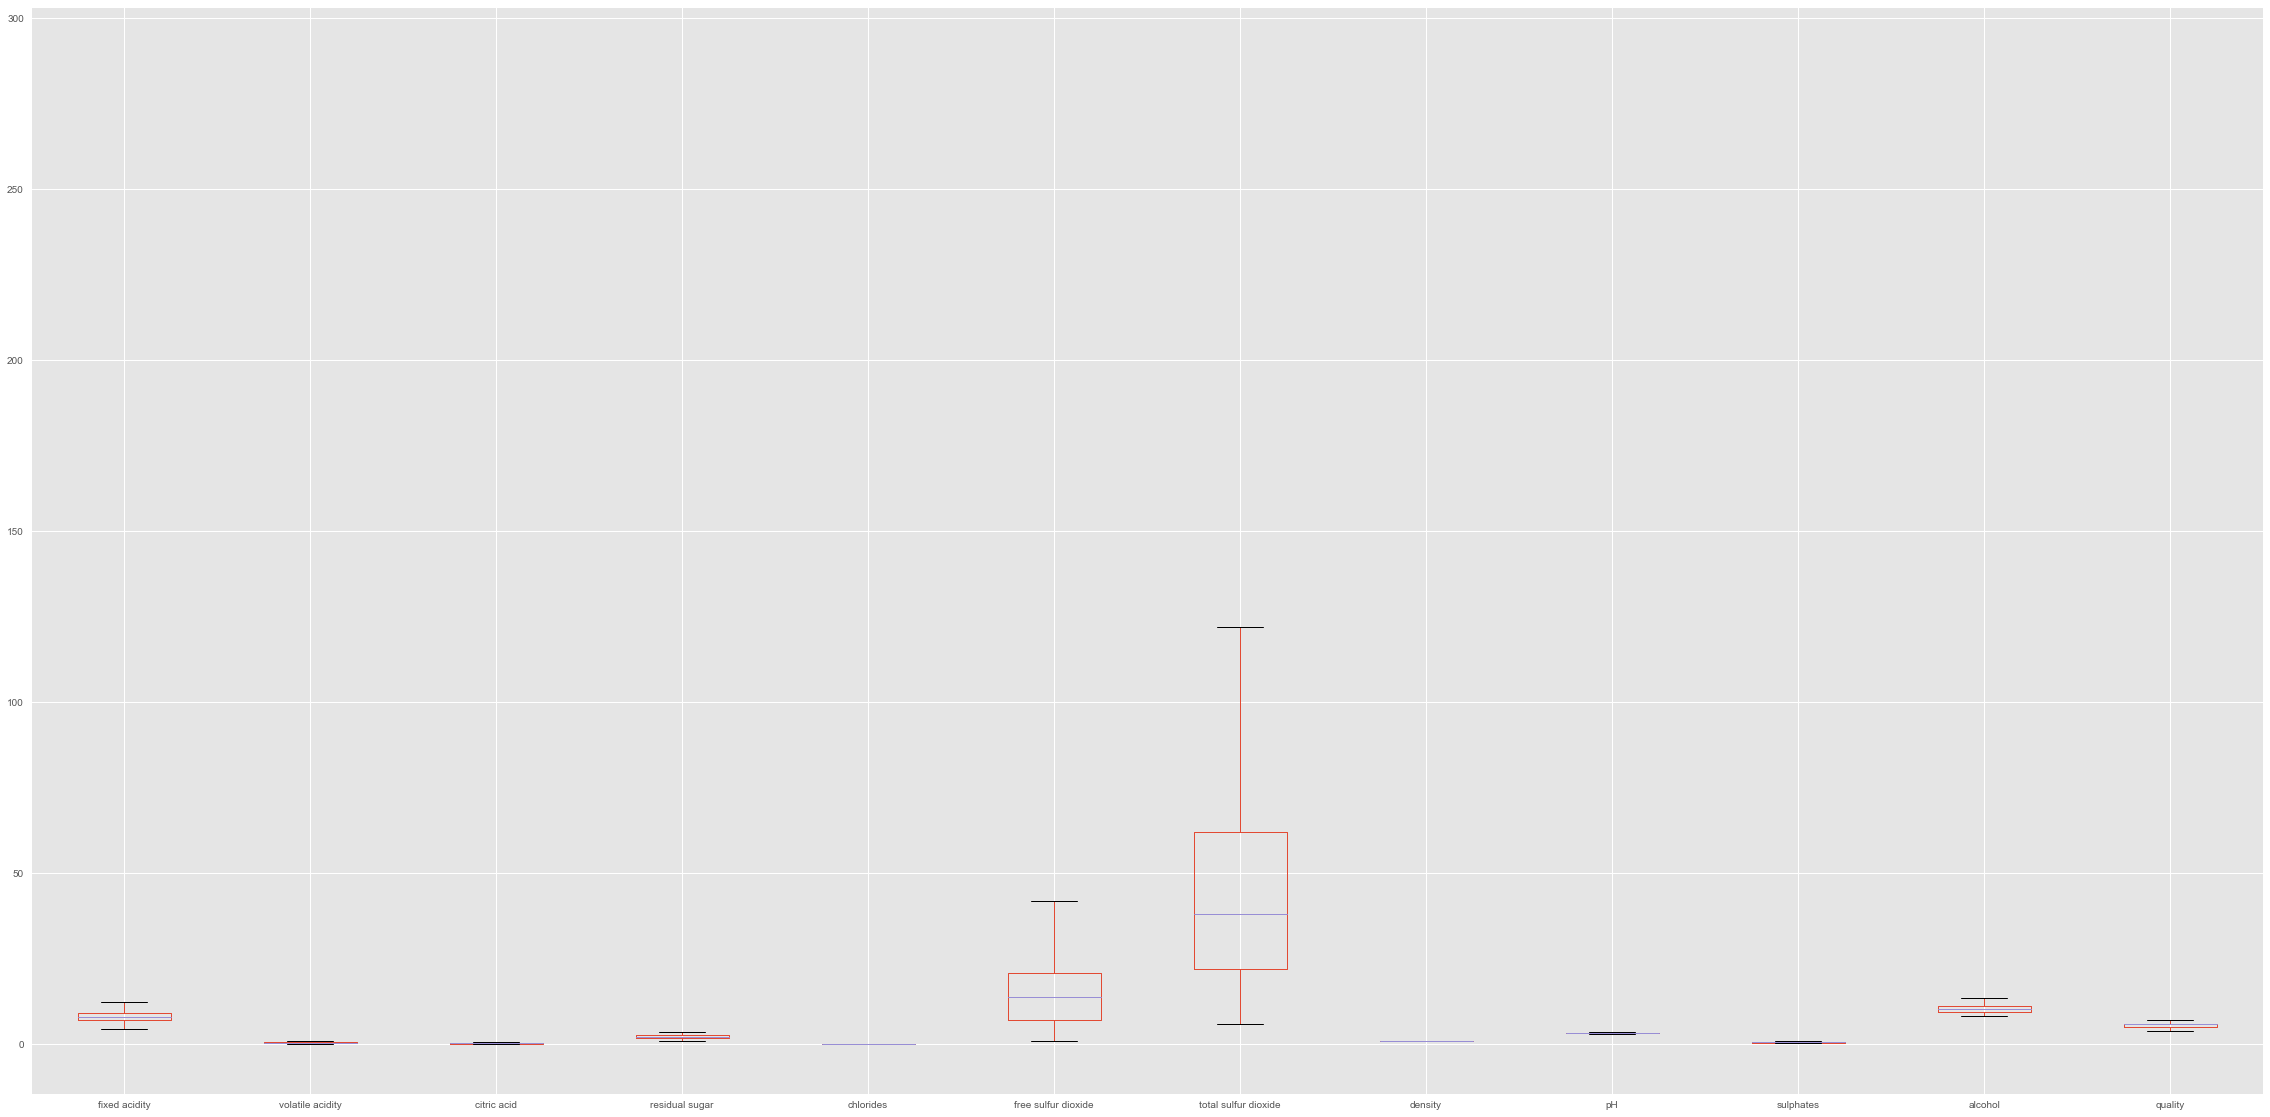

In [19]:
# Generate and show boxplot with specific figure size
data.plot.box(figsize=(40,20))

The main take-away from this boxplot is that the ranges for our variables differ. Some ranges are in small intervals around zero, other variables like "totel sulfur dioxide" range from around zero to outliers at 300.
This is a clear sign that we will have to **normalise** our features before we can apply a standard Machine Learning algorithm.

#### Histograms
We can also plot individual columns as histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c4c8e48>]], dtype=object)

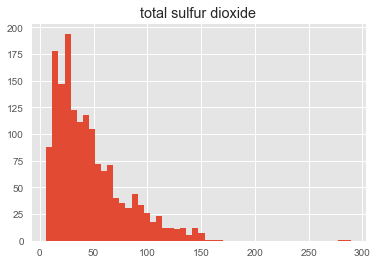

In [20]:
data.hist(column='total sulfur dioxide', bins=50)

#### Subplots
A real-time saver are automated subplots.
You can use these to discover correlations between pairs of your features, or between a feature and the response variable.

#### Other options
There are various other techniques that you can use.
You can find more [in the Pandas Visualisation documentation here](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

## 2.0 Seaborn for beautified plots

Pointers to more information if you are curious:
* [Homepage of Seaborn](https://seaborn.pydata.org/)
* [Seaborn Gallery for your inspiration](https://seaborn.pydata.org/examples/index.html)
* [Seaborn API (the description of things you can do with seaborn and how you have to call it)](https://seaborn.pydata.org/api.html)

In [21]:
# Seaborn for plotting and styling
import seaborn as sns

### Plotting a distribution of observations (one variable --> univariate)

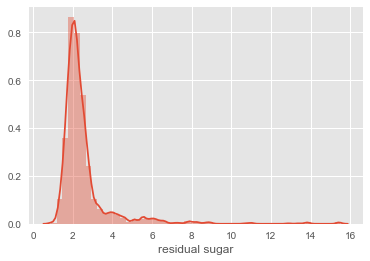

In [22]:
# Try other column names as well...
sns.distplot(data.loc[:, 'residual sugar'], kde=True, rug=False)

# If we use this command at the end, we prevent matplotlib from printing some text outputs together with the plot
plt.show()

### Scatterplot
Let us compare a single feature with the response variable...

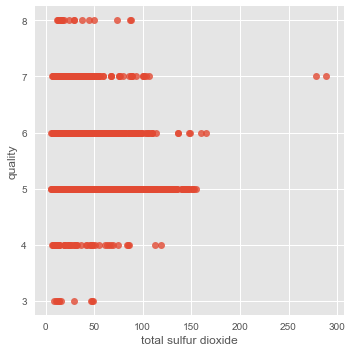

In [23]:
# We create a scatterplot by using what is actually a linear regression method (we just switch off the fit_reg)
sns.lmplot(x='total sulfur dioxide', y='quality', data=data, fit_reg=False)

# If we use this command at the end, we prevent matplotlib from printing some text outputs together with the plot
plt.show()

Let us play around and compare two features and the use the response variable 'quality' as the colour...

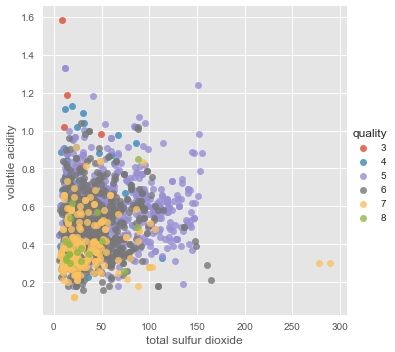

In [24]:
sns.lmplot(x='total sulfur dioxide', y='volatile acidity', data=data, fit_reg=False, hue='quality')

# If we use this command at the end, we prevent matplotlib from printing some text outputs together with the plot
plt.show()

### Boxplot

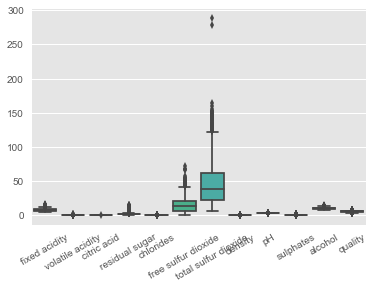

In [25]:
# Boxplot
plotty = sns.boxplot(data=data)

# Here, we rotate the labels a bit so they do not overlap and remain readable
plotty.set_xticklabels(plotty.get_xticklabels(), rotation=30)

# If we use this command at the end, we prevent matplotlib from printing some text outputs together with the plot
plt.show()

### Heatmap

Heatmaps can be useful to get a quick overview of correlations among variables, e.g. correlation among our features.

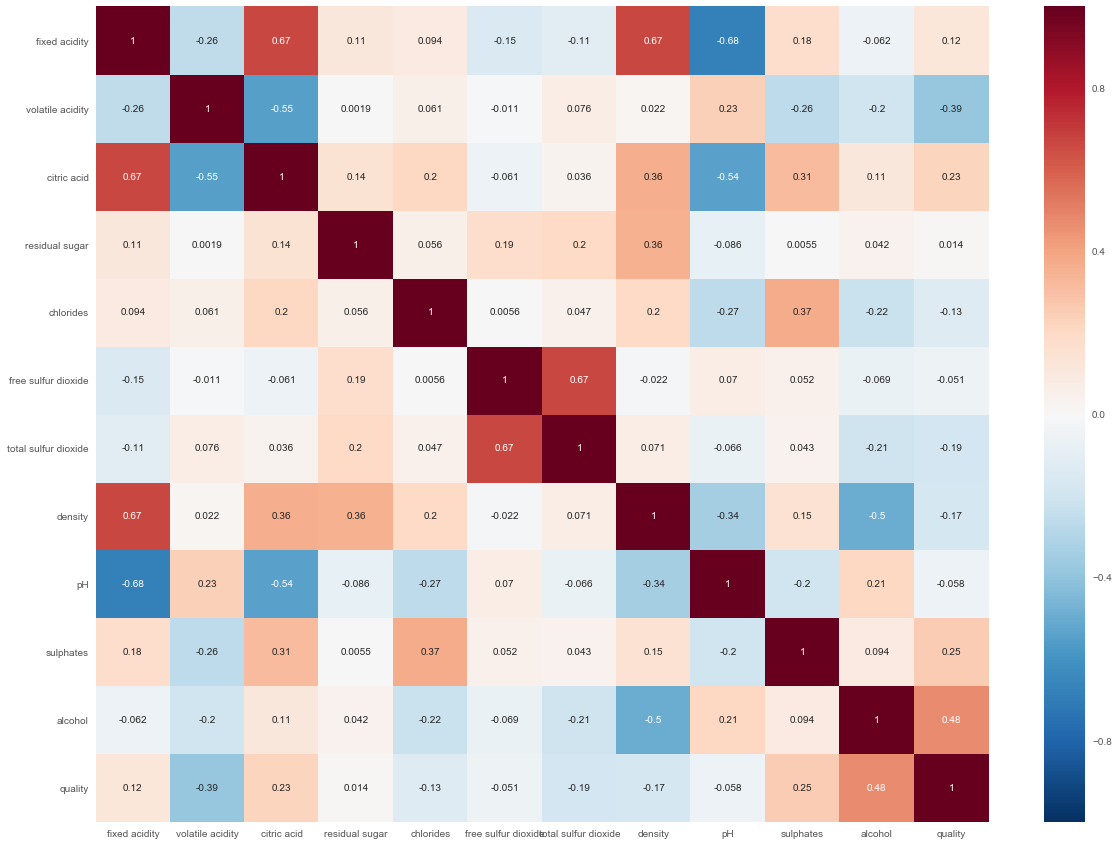

In [26]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

# If we use this command at the end, we prevent matplotlib from printing some text outputs together with the plot
plt.show()

It might not have been clear before but it makes sense now:
Obviously, the total sulfur dioxide correlates with the free sulfur dioxide.

And there are more correlations...

First, we need to import plotly.

(If you run this notebook locally, instead of on Azure, you will have to install plotly first using ```pip install plotly```.)

## 3.0 Bokeh

* Main documentation: https://bokeh.pydata.org/
* Bokeh in Jupyter notebooks: https://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html
* Gallery with examples: https://bokeh.pydata.org/en/latest/docs/gallery.html

In [34]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [35]:
# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the result
show(p)

## 4.0 Plotly for interactive data visualisations

Documentations if you want to read more about available options:
* Plotly for Python: https://plot.ly/python/
* Plotly used for iPython (Jupyter) notebooks: https://plot.ly/ipython-notebooks/
* Using plotly in azure notebooks: https://moderndata.plot.ly/using-plotly-in-jupyter-notebooks-on-microsoft-azure/

The following is just a Plotly tutorial used with Plotly Offline, so it can run without an account:
https://plot.ly/python/ipython-notebook-tutorial/
Feel free to follow the other steps in the tutorial on your own.

In [43]:
# The following is required to use the offline version of plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Here, we import a special library from plotly
from plotly import figure_factory as ff

We can then make use of all the plotly options for visualising data.

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
iplot(table, filename='jupyter/table1')

In [48]:
data = [go.Bar(x=df.School,
            y=df.Gap)]

iplot(data, filename='jupyter/basic_bar')